In [1]:
%matplotlib notebook
import numpy as np
import pandas
import matplotlib.pyplot as plt

import sedkcorr.sed_fitting.prospector as sedp

In [2]:
data = pandas.read_csv("SNf_mag_3kpc_prospector.dat", sep=' ', index_col='SN_name')
test_data = data.loc["PTF10qjq"]
#test_data

In [3]:
test = sedp.ProspectorSEDFitter()

In [4]:
test.load_obs(test_data)

In [5]:
test.load_sps()

In [6]:
test.load_model()

In [7]:
test.run_fit(write_res=True)

dynesty sampling...


iter: 1 | batch: 0 | nc: 1 | ncall: 1 | eff(%):  0.990 | logz: -516340990869022784.000 +/- 71500553.973 | dlogz:    inf >  0.050    /anaconda3/lib/python3.6/site-packages/prospect-0.2-py3.6.egg/prospect/fitting/nested.py:76: RuntimeWarning: invalid value encountered in sqrt
iter: 316 | batch: 0 | nc: 3 | ncall: 3092 | eff(%):  9.900 | logz: -4008083547.650 +/-  2.922 | dlogz:    inf >  0.050          /anaconda3/lib/python3.6/site-packages/prospect-0.2-py3.6.egg/prospect/fitting/nested.py:76: RuntimeWarning: invalid value encountered in sqrt
iter: 333 | batch: 0 | nc: 1 | ncall: 3152 | eff(%): 10.240 | logz: -3404524752.848 +/-  2.863 | dlogz:    inf >  0.050    /anaconda3/lib/python3.6/site-packages/prospect-0.2-py3.6.egg/prospect/fitting/nested.py:76: RuntimeWarning: invalid value encountered in sqrt
iter: 358 | batch: 0 | nc: 5 | ncall: 3225 | eff(%): 10.767 | logz: -2621889292.889 +/-  2.281 | dlogz:    inf >  0.050    /anaconda3/lib/python3.6/site-packages/prospect-0.2-py3.6.egg/pr


done dynesty (initial) in 749.5028598308563s
done dynesty (dynamic) in 5.413665056228638s
done dynesty in 755.033173084259s


RuntimeError: Unable to create link (name already exists)

In [8]:
test.set_run_params(outfile="test_snf_PTF10qjq")

In [9]:
test.write_results()

Could not JSON serialize run_params, pickled instead
Could not JSON serialize model_params, pickled instead


In [3]:
from sedkcorr.k_correction import sed_prospector
import os
DATAPATH = os.path.expanduser(os.getenv('DATAPATH'))

In [4]:
testres = sed_prospector.SED_prospector()

In [5]:
testres.set_data(filename="test_snf_PTF10qjq_mcmc.h5", data_meas=test_data)

<IPython.core.display.Javascript object>


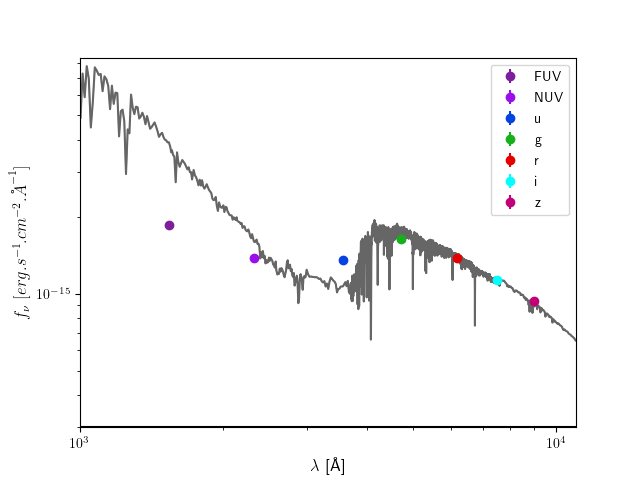

In [6]:
dict_fig = testres.show(y_plot="flux", sed_shifted=False, plot_bandpasses=False, plot_filter_points=True, 
                        xlim=(1000, 11000), ylim=(3e-16, None), savefile=None, xscale="log", yscale="log", 
                        flux_unit="AA")
dict_fig["ax"].legend(loc="upper right", ncol=1)

In [7]:
"Hz" in ("Hz", "Herz")

True

In [8]:
from astropy import units

In [9]:
test = 12
testu = units.m

In [12]:
test *= 2 * testu * units.s 

UnitTypeError: Cannot store quantity with dimension resulting from multiply function in a non-Quantity instance.

In [18]:
test = np.array([1, 2, 3, 4])

In [19]:
test = 2 * test * testu * units.s 
test

<Quantity [2., 4., 6., 8.] m s>

In [17]:
testres.p_res

{'model_params': [{'N': 1,
   'isfree': False,
   'init': 0.037241960987646434,
   'units': 'redshift',
   'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0),
   'name': 'zred'},
  {'N': 1,
   'isfree': True,
   'init': 10000000000.0,
   'units': 'Solar masses formed',
   'prior': <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0),
   'name': 'mass'},
  {'N': 1,
   'isfree': True,
   'init': -0.5,
   'units': '$\\log (Z/Z_\\odot)$',
   'prior': <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19),
   'name': 'logzsol'},
  {'N': 1,
   'isfree': True,
   'init': 0.6,
   'units': 'optical depth at 5500AA',
   'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0),
   'name': 'dust2'},
  {'N': 1, 'isfree': False, 'init': 4, 'units': 'FSPS index', 'name': 'sfh'},
  {'N': 1,
   'isfree': True,
   'init': 1,
   'units': 'Gyr',
   'prior': <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8),
   'name': 'tage'},
  {'N

In [18]:
len(testres.get_sed_wavelength())

5994

In [19]:
len(testres.data_sed)

5994

In [21]:
testres.p_res["chain"][-1000:, :].shape

(1000, 5)

In [6]:
test = testres.get_sed_error()

TypeError: Required argument 'object' (pos 1) not found

In [50]:
theta = testres.p_res["chain"][-500:, :]
mspec = np.empty((500, len(testres.get_sed_wavelength())))
for ii in range(500):
    mspec[ii], _, _ = testres.p_mod.mean_model(theta[ii], testres.p_obs, sps=testres.p_sps)

In [26]:
mspec.shape

(100, 5994)

<IPython.core.display.Javascript object>


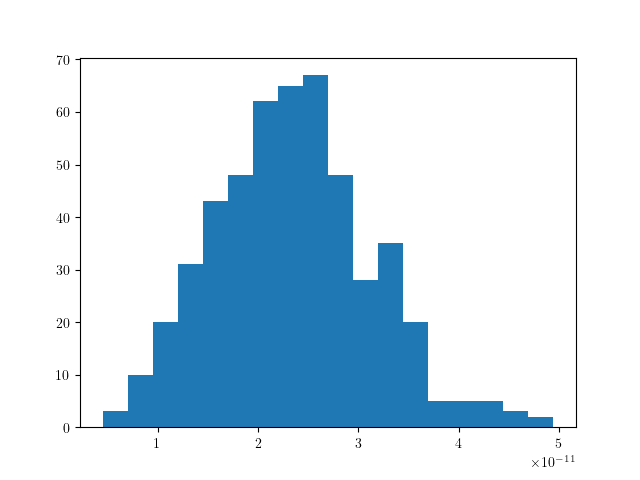

(array([ 3., 10., 20., 31., 43., 48., 62., 65., 67., 48., 28., 35., 20.,
         5.,  5.,  5.,  3.,  2.]),
 array([4.49843045e-12, 6.99670411e-12, 9.49497777e-12, 1.19932514e-11,
        1.44915251e-11, 1.69897987e-11, 1.94880724e-11, 2.19863461e-11,
        2.44846197e-11, 2.69828934e-11, 2.94811670e-11, 3.19794407e-11,
        3.44777143e-11, 3.69759880e-11, 3.94742617e-11, 4.19725353e-11,
        4.44708090e-11, 4.69690826e-11, 4.94673563e-11]),
 <a list of 18 Patch objects>)

In [51]:
fig, ax = plt.subplots()
ax.hist(mspec[:, -1], bins="auto")

In [44]:
np.mean(mspec, axis=0)

array([3.74832127e-17, 4.15410016e-17, 5.09986409e-17, ...,
       2.16138794e-11, 2.10417779e-11, 2.04989460e-11])

In [41]:
mspec.shape

(100, 5994)

In [9]:
from astropy import units


In [10]:
units.spectral_density(np.asarray([1500, 2000]) * units.AA)

[(Unit("erg / (Angstrom cm2 s)"),
  Unit("erg / (cm2 Hz s)"),
  <function astropy.units.equivalencies.spectral_density.<locals>.converter(x)>,
  <function astropy.units.equivalencies.spectral_density.<locals>.iconverter(x)>),
 (Unit("erg / (cm2 Hz s)"),
  Unit("erg / (cm2 s)"),
  <function astropy.units.equivalencies.spectral_density.<locals>.converter_f_nu_to_nu_f_nu(x)>,
  <function astropy.units.equivalencies.spectral_density.<locals>.iconverter_f_nu_to_nu_f_nu(x)>),
 (Unit("erg / (Angstrom cm2 s)"),
  Unit("erg / (cm2 s)"),
  <function astropy.units.equivalencies.spectral_density.<locals>.converter_f_la_to_la_f_la(x)>,
  <function astropy.units.equivalencies.spectral_density.<locals>.iconverter_f_la_to_la_f_la(x)>),
 (Unit("ph / (Angstrom cm2 s)"),
  Unit("erg / (Angstrom cm2 s)"),
  <function astropy.units.equivalencies.spectral_density.<locals>.converter_phot_f_la_to_f_la(x)>,
  <function astropy.units.equivalencies.spectral_density.<locals>.iconverter_phot_f_la_to_f_la(x)>),
 (U